In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 1. Positive or Negative Average Filter

A 3x3 filter that returns a positive value if the average value of the 4-adjacent neighbors is less than the center and a negative value otherwise.

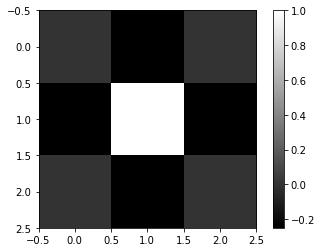

In [2]:
# takes negative average of four adjacent neighbors to center and sums with center value
kernel = np.asarray([[0,-0.25,0],[-0.25,1,-0.25],[0,-0.25,0]])

plt.imshow(kernel, cmap='gray')
plt.colorbar()
plt.show()

In [3]:
num_runs = 20

for i in range(num_runs):
    image = np.random.uniform(-10,10,size=(3,3))
    is_less_than = (1/4*image[0,1]+1/4*image[1,0]+1/4*image[1,2]+1/4*image[2,1]) < image[1,1]
    res = cv2.filter2D(image,-1,kernel)[1,1]
    if is_less_than and (res > 0):
        print("success (case 1)")
    elif not is_less_than and (res < 0):
        print("success (case 2)")
    else:
        print("failure: vals are ",is_less_than," but got ",res)

success (case 2)
success (case 2)
success (case 2)
success (case 1)
success (case 2)
success (case 2)
success (case 2)
success (case 2)
success (case 2)
success (case 2)
success (case 1)
success (case 2)
success (case 1)
success (case 1)
success (case 1)
success (case 1)
success (case 2)
success (case 2)
success (case 2)
success (case 1)


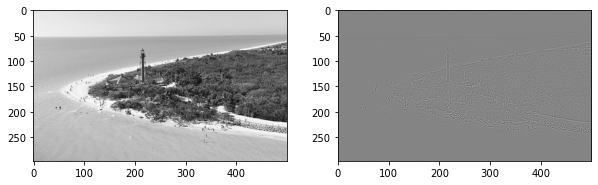

In [4]:
image = (cv2.imread('sanibel.jpg',0)).astype(np.float)
result = cv2.filter2D(image,-1,kernel)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.show()

### 2. Gradient Filter

Filter that computes the gradient in the x-direction:
$grad(y,x)=im(y,x+1)-im(y,x) \ \forall x,y$

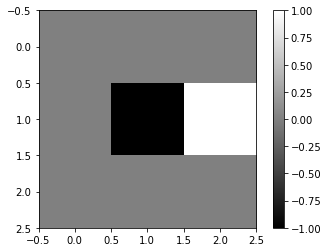

In [5]:
kernel=np.asarray([[0,0,0],[0,-1,1],[0,0,0]])

plt.imshow(kernel, cmap='gray')
plt.colorbar()
plt.show()

In [6]:
num_runs = 20

for i in range(num_runs):
    image = np.random.uniform(-10,10,size=(3,3))
    val = image[1,2]-image[1,1]
    res = cv2.filter2D(image,-1,kernel)[1,1]
    if val==res:
        print("success")
    else:
        print("failure: wanted ",val," but got ",res)

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


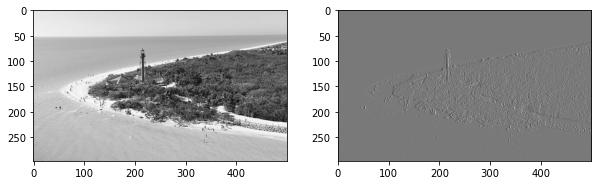

In [7]:
image = (cv2.imread('sanibel.jpg',0)).astype(np.float)
result = cv2.filter2D(image,-1,kernel)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.show()

### 3. Frequency Domain Transformations

1. Filter to get the horizontal edge of the image

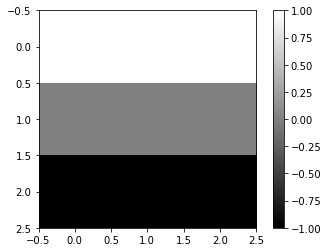

In [8]:
kernel_hz = np.asarray([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=np.float)

plt.imshow(kernel_hz, cmap='gray')
plt.colorbar()
plt.show()

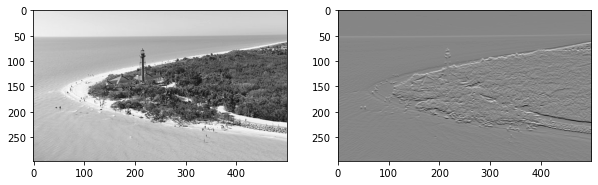

In [9]:
# test
image = (cv2.imread('sanibel.jpg',0)).astype(np.float)
result = cv2.filter2D(image,-1,kernel_hz)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.show()

2. Filter to get the vertical edge of the image

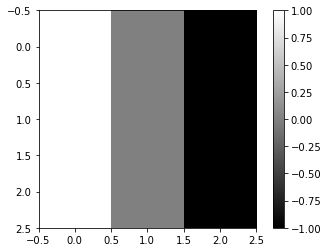

In [10]:
kernel_vt = np.asarray([[1,0,-1],[1,0,-1],[1,0,-1]], dtype=np.float)

plt.imshow(kernel_vt, cmap='gray')
plt.colorbar()
plt.show()

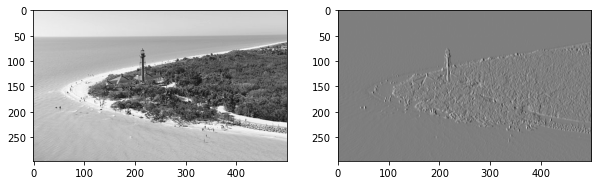

In [11]:
# test
image = (cv2.imread('sanibel.jpg',0)).astype(np.float)
result = cv2.filter2D(image,-1,kernel_vt)

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(result, cmap='gray')
plt.show()

3. Transform filters to frequency domain

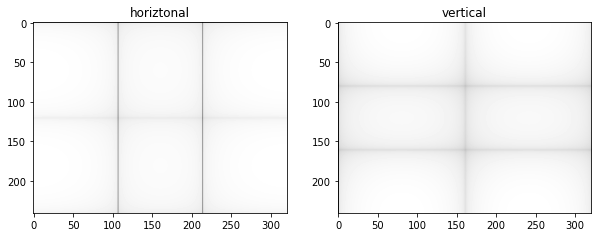

In [12]:
np.seterr(divide = 'ignore') 
image = (cv2.imread('sample1.jpg',0)).astype(np.float)

sz = (image.shape[0] - kernel_hz.shape[0], image.shape[1] - kernel_hz.shape[1])
kernel_hz = np.pad(kernel_hz, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)),'constant')
kernel_hz_fd = np.fft.ifftshift(kernel_hz)
kernel_hz_fd = np.fft.fft2(kernel_hz_fd)
kernel_hz_fd_mag = 20*np.log(np.abs(kernel_hz_fd))

sz = (image.shape[0] - kernel_vt.shape[0], image.shape[1] - kernel_vt.shape[1])
kernel_vt = np.pad(kernel_vt, (((sz[0]+1)//2, sz[0]//2), ((sz[1]+1)//2, sz[1]//2)),'constant')
kernel_vt_fd = np.fft.ifftshift(kernel_vt)
kernel_vt_fd = np.fft.fft2(kernel_vt_fd)
kernel_vt_fd_mag = 20*np.log(np.abs(kernel_vt_fd))

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(kernel_hz_fd_mag, cmap='gray')
plt.title("horiztonal")
plt.subplot(1,2,2)
plt.imshow(kernel_vt_fd_mag, cmap='gray')
plt.title("vertical")
plt.show()

4. Transform image to frequency domain

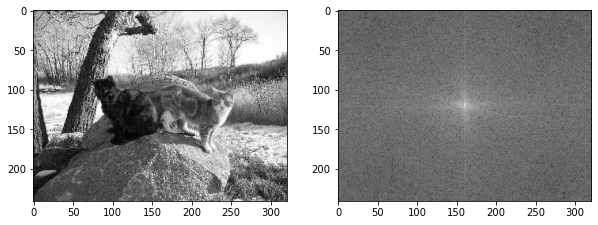

In [13]:
image = (cv2.imread('sample1.jpg',0)).astype(np.float)
image_fd = np.fft.fft2(image)
image_fd_mag = np.fft.fftshift(image_fd)
image_fd_mag = 20*np.log(np.abs(image_fd_mag))

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image_fd_mag, cmap='gray')
plt.show()

5. Apply filters

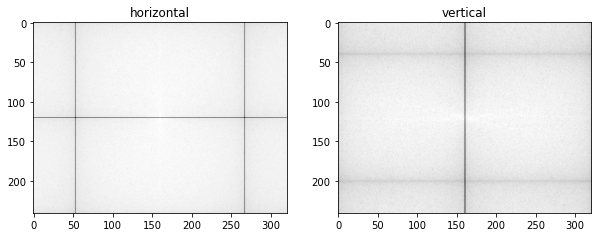

In [14]:
image_fd_hz = np.multiply(image_fd, kernel_hz_fd)
image_fd_vt = np.multiply(image_fd, kernel_vt_fd)

image_fd_hz_mag = np.fft.fftshift(image_fd_hz)
image_fd_hz_mag = 20*np.log(np.abs(image_fd_hz_mag))

image_fd_vt_mag = np.fft.fftshift(image_fd_vt)
image_fd_vt_mag = 20*np.log(np.abs(image_fd_vt_mag))

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image_fd_hz_mag, cmap='gray')
plt.title("horizontal")
plt.subplot(1,2,2)
plt.imshow(image_fd_vt_mag, cmap='gray')
plt.title("vertical")
plt.show()

6. Transform back to spatial domain

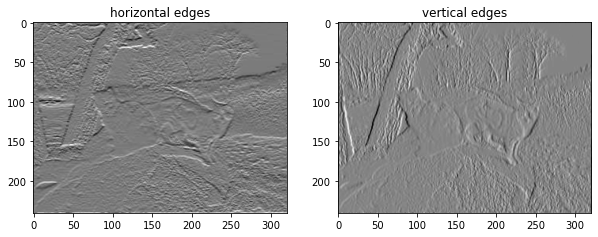

In [15]:
image_hz = np.real(np.fft.ifft2(image_fd_hz))
image_vt = np.real(np.fft.ifft2(image_fd_vt))

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image_hz, cmap='gray')
plt.title("horizontal edges")
plt.subplot(1,2,2)
plt.imshow(image_vt, cmap='gray')
plt.title("vertical edges")
plt.show()

7. Sum horizontal and vertical edge components together

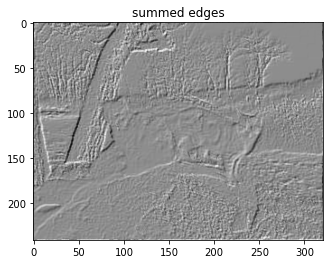

In [16]:
image_all = image_vt + image_hz

plt.imshow(image_all, cmap='gray')
plt.title("summed edges")
plt.show()